In [ ]:
'Calculating the average column size in the segmentation'

In [1]:
import os
import runpy
import time
from os.path import join as pjoin
import warnings
import glob
import sys
import csv
import pandas as pd
if not sys.warnoptions:
    warnings.simplefilter("ignore")
import numpy as np
from scipy import signal
from scipy.stats import zscore
from nilearn.image import load_img
from nilearn.masking import apply_mask
import matplotlib.pyplot as plt
import re
import warnings
from scipy import stats
import numpy as np
from nilearn.image import load_img
from sklearn.metrics import confusion_matrix
#from brainiak.funcalign.sssrm import SSSRM
%autosave 5 
%matplotlib inline


Bad key "text.kerning_factor" on line 4 in
/Users/akalyani/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


Autosaving every 5 seconds


In [2]:
'loading the path to columnar files'
#load labels and subjects
"""importing young """

with open('/Users/akalyani/Desktop/projects/somato_align/scripts/young_subjects.txt') as inf:
    reader = csv.reader(inf, delimiter="\t")
    young = list(zip(*reader))[0]

    
"""importing old """
with open('/Users/akalyani/Desktop/projects/somato_align/scripts/old_subjects.txt') as inf:
    reader = csv.reader(inf, delimiter="\t")
    old = list(zip(*reader))[0]
    
    
old = list(old)
old.pop(4)
young = list(young)
young.pop(2)
age = [young, old]

In [3]:
area = ['BA1','BA2','BA3b']

In [4]:
n_cols = (list(np.arange(10,100,10)))
n_cols2 =(list(np.arange(100,450,50)))
n_cols3 = np.concatenate((n_cols,n_cols2),axis = 0)

In [92]:
path_to = '/Volumes/RG_Kuehn/Avinash/cSRM/sense_data'

In [6]:
!export FREESURFER_HOME=/path/to/FreeSurfer
!source $FREESURFER_HOME/SetUpFreeSurfer.sh

In [112]:
column_number = [60,70,80,90,100]

In [152]:
column_size = np.zeros(shape=(3,2,len(n_cols3),19))
#stdv = [] #np.zeros(shape=(len(n_cols3), 2, 3 , len(feats)))
for col_idx, col in enumerate(column_number):
    for age_idx, sub_ids in enumerate(age):
        for sub_idx,sub_id in enumerate(sub_ids):
            for region_idx, region in enumerate(area):
                path_txt = pjoin(path_to,sub_id,'columnar_width/lh_columns_%s%s.txt'%(col,region))
                df = pd.read_fwf(path_txt, skiprows = 33)
                df.columns  = ['Index' ,'SegId' ,'NVoxels' ,'Volume_mm3' ,'StructName']
                mean_volume = df['NVoxels'].mean()
                
                column_size[region_idx,age_idx,col_idx,sub_idx] = mean_volume 
                
                #!mri_segstats --seg $path_col --sum $path_store
                

In [172]:
column_size[2,0,3].mean()

44.82748538011696

In [171]:
column_size[2,0,3].std()

4.775599079505609

In [141]:
old

['aae961',
 'ajz367',
 'bcs',
 'bmz426',
 'czg996',
 'dwr001',
 'fip660',
 'htr373',
 'igf001',
 'irv',
 'jlf001',
 'kvv494',
 'mln301',
 'nos',
 'oym138',
 'pdo804',
 'pnj156',
 'umn323',
 'wbs789']

In [142]:
young

['ben157',
 'clz082',
 'dqu023',
 'fva444',
 'ggx379',
 'gia487',
 'guw502',
 'irh385',
 'npx529',
 'oxi002',
 'pzp',
 'rev143',
 'srg',
 'sxp758',
 'tze824',
 'ulb827',
 'wtl296',
 'zmk890',
 'zyr407']

In [143]:
path_txt = '/Volumes/RG_Kuehn/Avinash/cSRM/sense_data/aae961/columnar_width/lh_columns_30BA1.txt'

In [149]:
df = pd.read_fwf(path_txt, skiprows = 33)

In [150]:
df.columns  = ['Index' ,'SegId' ,'NVoxels' ,'Volume_mm3' ,'StructName']

In [156]:
df

,Index,SegId,NVoxels,Volume_mm3,StructName
0,2,1,20,20.0,Seg0001
1,3,2,30,30.0,Seg0002
2,4,3,29,29.0,Seg0003
3,5,4,31,31.0,Seg0004
4,6,5,11,11.0,Seg0005
...,...,...,...,...,...
95,97,96,23,23.0,Seg0096
96,98,97,24,24.0,Seg0097
97,99,98,13,13.0,Seg0098
98,100,99,45,45.0,Seg0099


In [104]:
mean_volumne = df['NVoxels'].mean()
std_volumne = df['NVoxels'].sem()

In [157]:
std_volumne

7.941960775189327

In [158]:
mean_volumne

54.69491525423729

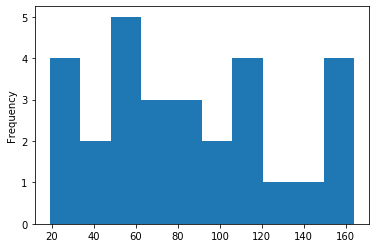

In [107]:
df['NVoxels'].plot.hist()

In [173]:
# Column profile map
path_col_profile = '/Volumes/RG_Kuehn/Avinash/cSRM/sense_data/aae961/columnar_width/column_accumulated_BA1100.dat'

In [177]:
df_123 = pd.read_fwf(path_col_profile)

In [178]:
df_123.T


0   \
0.000000 0.000000 0.000000 0.000000 0.000000 0....  898.807950 911.730191 901.669833 937.343475 93...   
Unnamed: 1                                                                                        NaN   
Unnamed: 2                                                                                        NaN   
Unnamed: 3                                                                                        NaN   
Unnamed: 4                                                                                        NaN   
Unnamed: 5                                                                                        NaN   
Unnamed: 6                                                                                        NaN   
Unnamed: 7                                                                                        NaN   
Unnamed: 8                                                                                        NaN   
Unnamed: 9                                                                                        NaN   
Unnamed: 10                                                                                       NaN   
Unnamed: 11                                                                                       NaN   
Unnamed: 12                                                                                       NaN   
Unnamed: 13                                                                                       NaN   
Unnamed: 14                                                                                       NaN   
Unnamed: 15                                                                                       NaN   
Unnamed: 16                                                                                       NaN   
Unnamed: 17                                                                                       NaN   
Unnamed: 18                                                                                       NaN   

                                                                                                   1   \
0.000000 0.000000 0.000000 0.000000 0.000000 0....  0.000000 0.000000 0.000000 0.000000 0.000000 0...   
Unnamed: 1                                                                                        NaN   
Unnamed: 2                                                                                        NaN   
Unnamed: 3                                                                                        NaN   
Unnamed: 4                                                                                        NaN   
Unnamed: 5                                                                                        NaN   
Unnamed: 6                                                                                        NaN   
Unnamed: 7                                                                                        NaN   
Unnamed: 8                                                                                        NaN   
Unnamed: 9                                                                                        NaN   
Unnamed: 10                                                                                       NaN   
Unnamed: 11                                                                                       NaN   
Unnamed: 12                                                                                       NaN   
Unnamed: 13                                                                                       NaN   
Unnamed: 14                                                                                       NaN   
Unnamed: 15                                                                                       NaN   
Unnamed: 16                                                                                       NaN   
Unnamed: 17                                                                                       NaN   
Unn